In [1]:
import pandas as pd
import numpy as np

In [4]:
df_orders = pd.read_csv('./data/Orders.csv')
df_promo = pd.read_csv('./data/PromotionOrders.csv')

C:\Users\jestw\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(df_orders.columns)
print("\n")
print(df_promo.columns)

Index(['DateId', 'MemberId', 'OrderGroupCode', 'TrackSourceTypeDef',
       'TrackDeviceTypeDef', 'PayProfileTypeDef', 'SalesOrderSlaveId',
       'SalePageId', 'IsMajor', 'IsGift', 'IsSalePageGift', 'Quantity',
       'UnitPrice', 'PromotionDiscount', 'ECouponId', 'ECouponDiscount',
       'SalesOrderSlaveTotalPayment', 'SalesOrderSlaveDateTime',
       'SalesOrderReceiverId', 'City', 'District', 'ZipCode', 'StoreName',
       'StoreId', 'DeliverTypeDef', 'StatusDef', 'ReturnGoodsDateId',
       'CauseDef'],
      dtype='object')


Index(['SalesOrderSlaveId', 'PromotionId', 'SalesOrderSlavePromotionDiscount',
       'SalesOrderSlavePromotionDiscountAllocated',
       'SalesOrderSlavePromotionDiscountAllocatedQty',
       'SalesOrderSlavePromotionDiscountRate', 'DiscountType',
       'PromotionCondition_DiscountPrice', 'PromotionCondition_DiscountRate',
       'PromotionCondition_TotalPrice', 'PromotionCondition_TotalQty',
       'PromotionStartDateTime', 'PromotionEndDateTime'],
     

In [6]:
df_promo['DiscountType'].unique()

array(['滿額折現', '滿件打折', '任選優惠價', '滿額贈', '會員滿額打折', '滿件折現', '滿額打折'], dtype=object)

In [7]:
df_promo = df_promo[(df_promo['DiscountType'] == '滿額折現') | (df_promo['DiscountType'] == '滿額打折')]

In [8]:
df_promo_tot = df_promo[df_promo['PromotionCondition_TotalPrice'].notnull()]
df_promo_tot.head()

,SalesOrderSlaveId,PromotionId,SalesOrderSlavePromotionDiscount,SalesOrderSlavePromotionDiscountAllocated,SalesOrderSlavePromotionDiscountAllocatedQty,SalesOrderSlavePromotionDiscountRate,DiscountType,PromotionCondition_DiscountPrice,PromotionCondition_DiscountRate,PromotionCondition_TotalPrice,PromotionCondition_TotalQty,PromotionStartDateTime,PromotionEndDateTime
0,40086585,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
1,40088089,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
2,40090756,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
3,40090763,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000
4,40091003,62671,100.0,-12.0,1,0.0,滿額折現,100.0,0.0,1000.0,0,2017-07-10 11:00:00.000,2017-07-31 10:59:00.000


In [9]:
df_promo_tot = df_promo_tot[['SalesOrderSlaveId','DiscountType','PromotionCondition_TotalPrice']]
df_promo_tot.head()

,SalesOrderSlaveId,DiscountType,PromotionCondition_TotalPrice
0,40086585,滿額折現,1000.0
1,40088089,滿額折現,1000.0
2,40090756,滿額折現,1000.0
3,40090763,滿額折現,1000.0
4,40091003,滿額折現,1000.0


In [10]:
df_orders = df_orders[['OrderGroupCode','SalesOrderSlaveId','MemberId', 'Quantity','UnitPrice','SalesOrderSlaveTotalPayment','PromotionDiscount','StatusDef']]
df_orders.head()

,OrderGroupCode,SalesOrderSlaveId,MemberId,Quantity,UnitPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,StatusDef
0,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457777,1388133,1,350.0,350.0,0.0,Finish
1,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457778,1388133,1,199.0,199.0,0.0,Finish
2,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457779,1388133,1,199.0,199.0,0.0,Finish
3,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,4457780,1388133,1,225.0,225.0,0.0,Finish
4,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",4457791,365787,1,100.0,100.0,0.0,Finish


In [11]:
df = pd.merge(df_promo_tot,df_orders, how='left', on='SalesOrderSlaveId')
df.head()

,SalesOrderSlaveId,DiscountType,PromotionCondition_TotalPrice,OrderGroupCode,MemberId,Quantity,UnitPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,StatusDef
0,40086585,滿額折現,1000.0,b'!\x96P\x13\xc6\xed\xdb\xe7\xc7\x01\xefz\xe8\...,779715.0,1.0,320.0,308.0,-12.0,Cancel
1,40088089,滿額折現,1000.0,b'$\xf5LTr\x86\xaf\x1c\xbc\x8c\xed\xbcD\x9cw\x...,607036.0,1.0,180.0,168.0,-12.0,Finish
2,40090756,滿額折現,1000.0,b'\xbc\xcd\xc1rIU\xbc\x84\xaa[f\xc8\xf1\xdd\x8...,801590.0,1.0,199.0,187.0,-12.0,Cancel
3,40090763,滿額折現,1000.0,b'\xbc\xcd\xc1rIU\xbc\x84\xaa[f\xc8\xf1\xdd\x8...,801590.0,1.0,295.0,283.0,-12.0,Cancel
4,40091003,滿額折現,1000.0,b'\xca\xe2\xaa3m\xc6\xc0/\x8d\xb9\xaa\x9b\xff\...,32633.0,1.0,250.0,238.0,-12.0,Overdue


In [12]:
df_fin = df[df['StatusDef'] == 'Finish']

In [13]:
print("滿額折現/折扣訂單總數：", df['OrderGroupCode'].nunique())
print("滿額折現/折扣訂單完成數：", df_fin['OrderGroupCode'].nunique())
print("滿額折現/折扣訂單完成率：", df_fin['OrderGroupCode'].nunique()/df['OrderGroupCode'].nunique())

滿額折現/折扣訂單總數： 306105
滿額折現/折扣訂單完成數： 238518
滿額折現/折扣訂單完成率： 0.7792032145832313


In [14]:
df_new = df_fin.groupby(by=['OrderGroupCode','PromotionCondition_TotalPrice'])['SalesOrderSlaveTotalPayment','PromotionDiscount'].sum()
df_new.reset_index(inplace=True)
df_new.head()

,OrderGroupCode,PromotionCondition_TotalPrice,SalesOrderSlaveTotalPayment,PromotionDiscount
0,"b"" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\...",899.0,1583.0,-100.0
1,"b"" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\...",800.0,697.0,-352.0
2,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",800.0,2042.0,-390.0
3,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",1200.0,2042.0,-390.0
4,"b"" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\x...",1500.0,1051.0,-96.0


In [15]:
df_new['AddProfit'] =  df_new['SalesOrderSlaveTotalPayment'] - df_new['PromotionCondition_TotalPrice']
df_new.head()

,OrderGroupCode,PromotionCondition_TotalPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,AddProfit
0,"b"" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\...",899.0,1583.0,-100.0,684.0
1,"b"" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\...",800.0,697.0,-352.0,-103.0
2,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",800.0,2042.0,-390.0,1242.0
3,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",1200.0,2042.0,-390.0,842.0
4,"b"" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\x...",1500.0,1051.0,-96.0,-449.0


In [16]:
df_new['ROI'] =  df_new['AddProfit'] / abs(df_new['PromotionDiscount'])
df_new.head()

,OrderGroupCode,PromotionCondition_TotalPrice,SalesOrderSlaveTotalPayment,PromotionDiscount,AddProfit,ROI
0,"b"" $\xe1\x81\xef\x9c\xa4h]\t5-\xcf'+[\xfe\x97\...",899.0,1583.0,-100.0,684.0,6.840000
1,"b"" %\xbd\xa2\x0c\x04&\xa6d\xc1K\xd5\xc0\xb7v'\...",800.0,697.0,-352.0,-103.0,-0.292614
2,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",800.0,2042.0,-390.0,1242.0,3.184615
3,"b"" '\x7f4\xac\x1a\x91WL\xb9\xbc\xf0\xf5\xdd\xa...",1200.0,2042.0,-390.0,842.0,2.158974
4,"b"" *A\x13\xe9\x17\xfc\xc3(\x0f\x08\xa2bh\xdd\x...",1500.0,1051.0,-96.0,-449.0,-4.677083


In [17]:
df = df_new.groupby(by=['PromotionCondition_TotalPrice'])['ROI'].sum()
pd.DataFrame(df)
df.reset_index()

,PromotionCondition_TotalPrice,ROI
0,299.0,569.905724
1,399.0,139.999660
2,666.0,21505.757494
3,777.0,10.171485
4,799.0,153.806964
5,800.0,82743.527526
6,888.0,12665.497981
7,899.0,35126.198675
8,1000.0,128788.240462
9,1111.0,18898.239160


In [18]:
df_new['PromotionCondition_TotalPrice'].unique()

array([  899.,   800.,  1200.,  1500.,   666.,  1000.,   888.,  1111.,
         299.,   799.,   399.,   777.])

In [19]:
promo_price = sorted(df_new['PromotionCondition_TotalPrice'].unique())
print(promo_price)

[299.0, 399.0, 666.0, 777.0, 799.0, 800.0, 888.0, 899.0, 1000.0, 1111.0, 1200.0, 1500.0]


In [20]:
print('Promo Price', str(promo_price[1]))

Promo Price 399.0


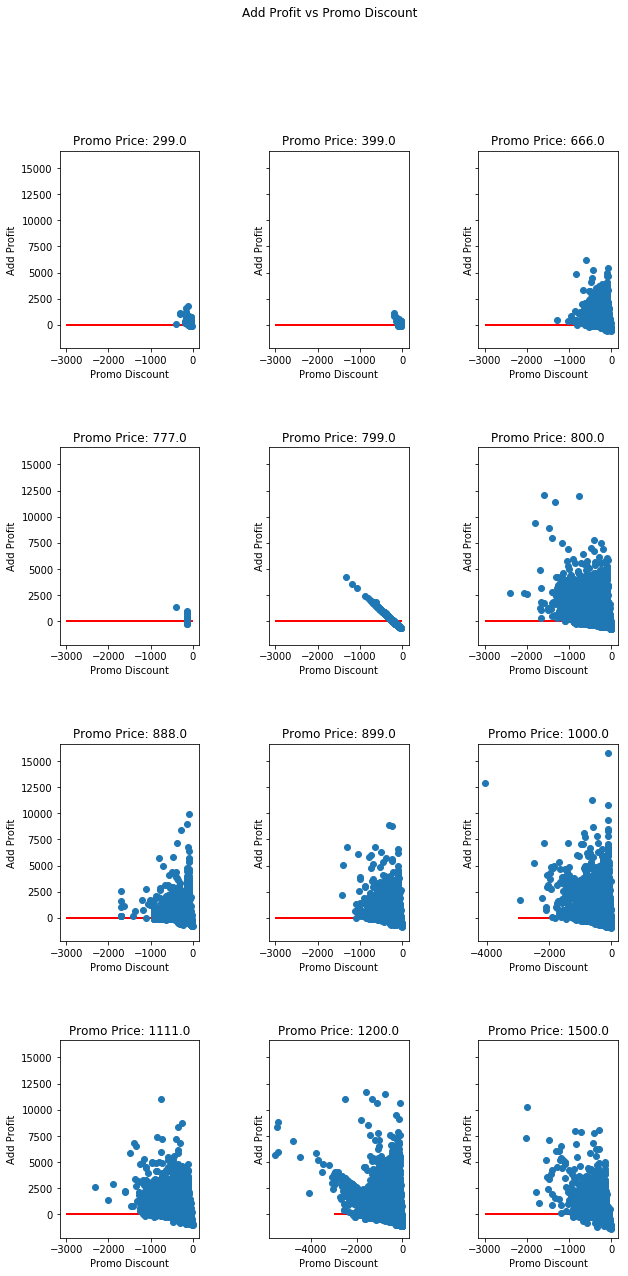

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(4,3, figsize=(10, 20), sharey=True)
fig.subplots_adjust(hspace = .5, wspace=.5)

axs = axs.ravel()

for i in range(len(promo_price)):
    df = df_new[df_new['PromotionCondition_TotalPrice'] == promo_price[i]]
    axs[i].plot(df['PromotionDiscount'], df['AddProfit'], 'o')
    axs[i].set_title('Promo Price: ' + str(promo_price[i]))
    axs[i].set_ylabel('Add Profit')
    axs[i].set_xlabel('Promo Discount')
    axs[i].hlines(y=0, xmin=-3000, xmax=0, colors='r', linewidths=2)

fig.suptitle('Add Profit vs Promo Discount')
plt.show()

_______________________________________________________________________________________________________________________________